<a href="https://colab.research.google.com/github/vishnudas-raveendran/AI_RL_Python/blob/master/Three_armed_bandit_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bandit Problem

##Background
The Bandit problem is to illustrate a scenario whereby you have to choose a decision which will result in getting you the maximum rewards. The decision may be wrong or correct which would not be known until you take it, however when you have to re-iterate taking the same decisions over and over again. You evdntually get an intuition (or a quantitative definite answer) to which decision could give you a better result and you learn over-time.

Bandit here refers to the slot machines in Casinos. The slot machine has an arm and a set of reels with images on it. When an arm is pulled, by a game a chance a combination of images are selected in the reels. These combination of images decide the reward given to the player. This machine is also called a one-armed bandit, because of the tendency of a player to lose large amount of money.


##Problem Description



# Implementation of Epsilon greedy strategy


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class Bandit:
  def __init__(self,trueMean):
    self.trueMean = trueMean
    self.mean = 0
    self.N = 0
    self.pull_values = []

  def pull(self):
    reward = np.random.randn() + self.trueMean
    return reward
  
  def update(self,x):
    self.N += 1;
    self.mean = (1-(1/self.N))*self.mean + 1/self.N*x
  


The class Bandit has a trueMean which we intialise during program run. 

**Question:**

**Why do we have a gussian normal distribution added to the trueMean?**

It is the reward function. So, I think the goal here is to get a large number as a reward.
*(I will fill this in has and when I understand more about this...)*

Next is the update function, which updates our mean of the machine. It basically finds mean for each step and adds the mean upto N-1 steps to the current N to give the new mean. This avoids keeping track of all Xi for N values.








In [0]:
def run_game(m1,m2,m3, eps, N):
  bandits = [Bandit(m1),Bandit(m2),Bandit(m3)]
  data = np.empty(N)
  chosen_bandit = np.empty(3)
  for i in range(N):
    p = np.random.random();
    if p < eps:
      # explore: choose randomly between the three slot machines
      j = np.random.choice(3)
    else:
      # exploit: choose the best slot machine that gives a good reward
      j = np.argmax([b.mean for b in bandits])
    # now that we have selected the slot machine, lets pull its arm
    # to get a reward
    x = bandits[j].pull()
    bandits[j].update(x)
    # for plotting the reward
    data[i] = x
    # to check which slot machine was pulled most, store the frequency of each bandit
    chosen_bandit[j] = chosen_bandit[j]+1

  print("Sample reward values: ")
  print(data[100:150])
  cumulative_average = np.cumsum(data)/(np.arange(N) + 1)

  plt.plot(data)
  plt.xscale('log')
  plt.title("Rewards on each pull (eps ="+str(eps)+")")
  plt.show()

  plt.bar(["Bandit 1", "Bandit 2", "Bandit 3"], chosen_bandit)
  plt.title("Frequency of bandit chosen (eps = "+str(eps)+")")
  plt.show()

  print("plotting cum avg on log scale (eps= "+str(eps)+")...")
  plt.plot(cumulative_average, label="cumulative average")
  plt.plot(np.ones(N)*m1, label="m1")
  plt.plot(np.ones(N)*m2, label="m2")
  plt.plot(np.ones(N)*m3, label="m3")
  plt.xscale('log')
  plt.legend()
  plt.show()

  
  # this mean is just to observe mean of the bandit converging to the true mean specified in the args
  print("Mean of bandits: \n")
  for b in bandits:
    print(b.mean)

  return cumulative_average


Sample reward values: 
[1.69181099 5.15992275 2.26256194 2.98857767 2.30411076 3.66620785
 0.24560123 2.52775795 2.98855246 2.74988631 4.20774152 3.09217383
 4.04052535 1.34038739 2.94647288 3.60329228 2.03666363 6.14305359
 3.1103554  2.92797574 3.34240003 4.0449775  1.05616961 3.81835097
 3.23470795 4.78241578 2.09273756 3.9518727  1.86433913 2.1371099
 1.69477703 3.32666091 3.5343779  1.50488357 3.86618001 1.54526284
 2.60540257 2.88216253 3.21702527 4.17542792 2.82758293 3.05386842
 3.36223667 2.91163678 3.39514273 3.98625228 2.10137433 1.96132006
 5.09486299 4.00166017]


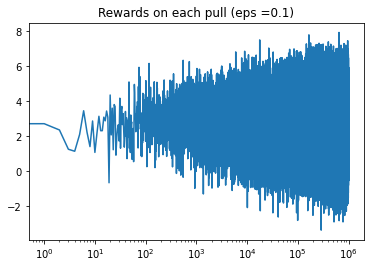

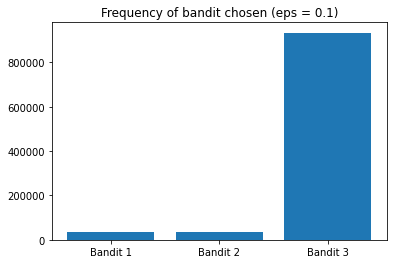

plotting cum avg on log scale (eps= 0.1)...


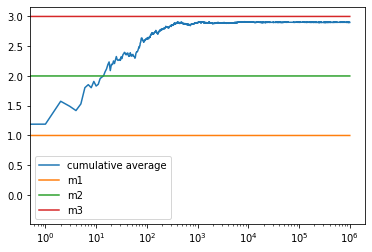

Mean of bandits: 

0.9964354523270755
1.99323621657194
3.0000913747979445
Sample reward values: 
[3.05434853 1.52953439 2.95715885 0.88701132 2.67432251 3.12771001
 4.13451758 2.32302069 2.3296327  3.72813923 2.47511212 1.83486527
 0.24292783 1.01009123 1.69964505 4.21255666 3.33516179 3.20803293
 3.78699833 3.16456284 1.67056979 1.46338979 2.51689845 2.43343249
 0.83745753 3.85556783 3.25364772 1.7612936  3.91264775 2.31793152
 0.97450111 3.76738282 4.05339816 3.52767859 1.43640857 0.55142355
 1.91993839 3.2497302  3.62223496 3.9436074  3.0915433  1.85295968
 1.6499072  2.75256462 2.66540529 3.46635867 2.12262554 3.69656314
 2.0018148  3.10176737]


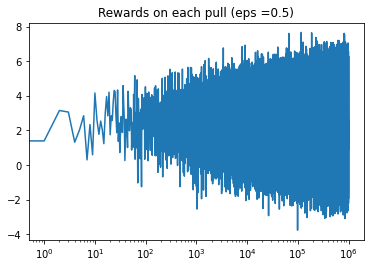

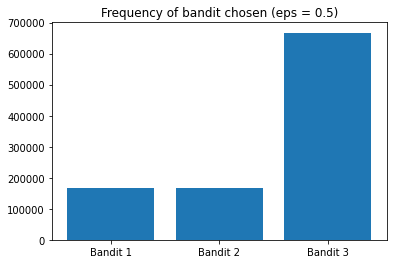

plotting cum avg on log scale (eps= 0.5)...


/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


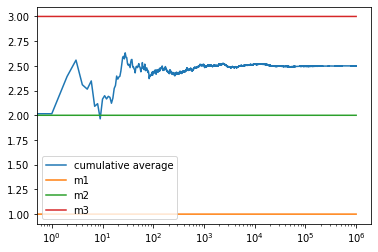

Mean of bandits: 

0.9953963268626117
2.001985684981119
2.9981520920173192
Sample reward values: 
[ 1.25167252  2.75714074  1.48774787  0.27689129  4.18901171  1.39620521
  2.15717708  1.39629458  1.32545976  1.16147912  1.14176669  2.99883552
 -0.85051896  4.11477727  1.93479516  1.79954197  2.4564679   1.96903103
  1.40396003  2.05535375  4.16826521  4.02374306  2.20720591  1.62995654
  2.64251962  2.45175189  0.32131795  4.0842792   3.84958586  1.78352634
  1.71361059  2.70256871  1.37622485  5.65517787  0.05481234  2.53160008
  2.73191739  2.86092502  3.51960749  1.04231108  2.78117855  1.69261862
  3.75471076  1.63062638  3.32681824  0.28266574  0.53892789  2.151854
  4.16824291  3.13467279]


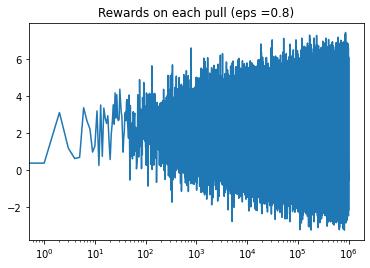

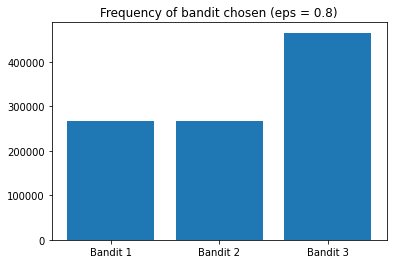

plotting cum avg on log scale (eps= 0.8)...


/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


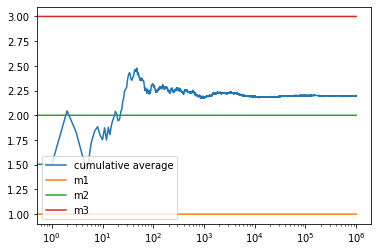

Mean of bandits: 

1.0018492696456407
2.0012861853182113
2.996690570844282


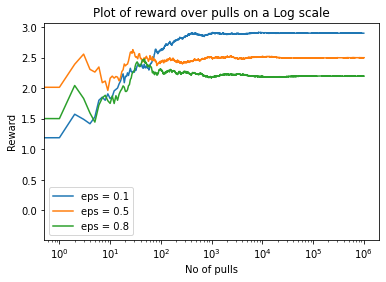

In [0]:
if __name__ == '__main__':
  c_1 = run_game(1.0,2.0,3.0, 0.1, 1000000)
  c_5 = run_game(1.0,2.0,3.0, 0.5, 1000000)
  c_8 = run_game(1.0,2.0,3.0, 0.8, 1000000)

  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_5, label='eps = 0.5')
  plt.plot(c_8, label='eps = 0.8')
  plt.legend()
  plt.title("Plot of reward over pulls on a Log scale")
  plt.xlabel("No of pulls")
  plt.ylabel("Reward")
  plt.xscale('log')
  plt.show()



When the eps value is high, we tend to expore more and exploit less. The inverse is true for low epsilon value.

At high eps value, half the time we have chosen the less optimal bandits while  at eps=0.1 we are exploiting i.e. choosing the bandit which has a large mean among the three. 

**Question**

**I am very confused over the true-mean intialised for each bandit. The reward function arbitarily adds a guassian number to the mean. So in case of the m1,m2,m3 of 1,2,3, when the exploit is done more (eps=0.1) for 90% of the cases, the bandit with the larger mean would be chosen which would be the third one which has large true-mean. Then, we end up choosing the third bandit more as shown in figure above. Whereas, if it was high epsilon(eps=0.8) then for 80% of the cases we explore more, resulting in lesser optimal rewards and pulling other two bandits more. So, here true-mean actually means reward-weight?**

(This is what I think happens) The actual experiment programatically should be, by epsilon strategy choose one of the bandits resolving the explore and exploit dilemma. Now, when an arm is pulled the bandit should pull give a reward. The reward is randomly generated and as we do more iterations we get an intuition of which bandit has a higher chance of giving a reward. Therefore, here we are already riding on the assumption that the bandits are biased and that some give better result than others. This idea is what is captured in the true mean. The true-mean adds a bias to the bandits. The idea of the above experiment is to find the bandit with this higher bias. Now, for finding it we can do two approaches
1. Run bandits for a sizable sample N of statistical significance and get the mean of rewards in the end after N runs. 
2. Run for N times and converge towards finding the bandit with the higher bias. To converge we have to either explore or exploit. Which is to say, we have to pull one of the possible less-optimal bandit once in a while so that we can see if it gives a high reward else we go with the bandit which according to the currently collected mean of each machine has highest value. 
After a certain size of samples of statistical significance, we can do just exploit and don't have to explore anymore.



# Implementation of Epsilon Optimistic Strategy

In [0]:
class Bandit_Optimistic:
  def __init__(self,true_mean, upper_limit):
    self.true_mean = true_mean
    self.mean = upper_limit
    self.N = 1

  def pull(self):
    reward = np.random.randn() + self.true_mean
    return reward
  
  def update(self,x):
    self.N += 1;
    self.mean = (1-(1/self.N))*self.mean + 1/self.N*x
  


In [0]:
def run_game_optimistic(m1,m2,m3, N):
  bandits = [Bandit_Optimistic(m1,10),Bandit_Optimistic(m2,10),Bandit_Optimistic(m3,10)]
  data = np.empty(N)
  chosen_bandit = np.empty(3)
  for i in range(N):
    j = np.argmax([b.mean for b in bandits])
    # now that we have selected the slot machine, lets pull its arm
    # to get a reward
    x = bandits[j].pull()
    bandits[j].update(x)
    # for plotting the reward
    data[i] = x
    # to check which slot machine was pulled most, store the frequency of each bandit
    chosen_bandit[j] = chosen_bandit[j]+1

  print("Sample reward values: ")
  print(data[100:150])
  cumulative_average = np.cumsum(data)/(np.arange(N) + 1)

  plt.plot(data)
  plt.xscale('log')
  plt.title("Rewards on each pull")
  plt.show()

  plt.bar(["Bandit 1", "Bandit 2", "Bandit 3"], chosen_bandit)
  plt.title("Frequency of bandit chosen")
  plt.show()

  print("plotting cum avg on log scale...")
  plt.plot(cumulative_average, label="cumulative average")
  plt.plot(np.ones(N)*m1, label="m1")
  plt.plot(np.ones(N)*m2, label="m2")
  plt.plot(np.ones(N)*m3, label="m3")
  plt.xscale('log')
  plt.legend()
  plt.show()

  
  # this mean is just to observe mean of the bandit converging to the true mean specified in the args
  print("Mean of bandits: \n")
  for b in bandits:
    print(b.mean)

  return cumulative_average


Sample reward values: 
[3.56718093 2.85504895 1.72459733 3.62122484 1.71279501 4.12661411
 3.29895472 2.44740203 1.83554462 2.57233507 3.44973743 3.35581175
 5.43799463 1.779712   3.49490887 4.26607673 1.81060926 1.61725881
 1.74771605 3.13444712 3.9789087  2.67517409 3.14707135 2.40504222
 2.84017169 3.42804353 2.33613733 3.5495276  2.78423749 2.63487094
 1.57168196 3.10275829 1.2053146  2.78031066 3.64967084 4.02838711
 2.62328907 3.61434982 2.08538773 1.94908383 1.8685853  3.7574228
 2.99104815 3.56318857 3.58001496 2.55077133 2.99191842 4.25189555
 2.83069897 3.73831468]


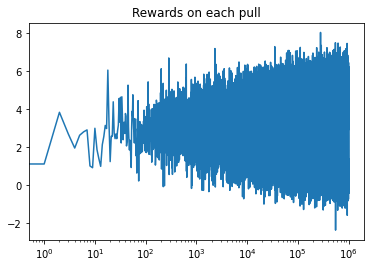

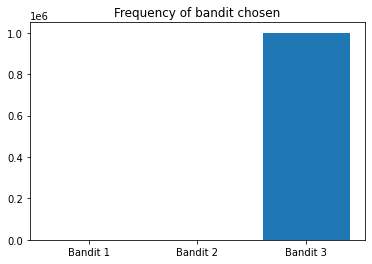

plotting cum avg on log scale...


/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


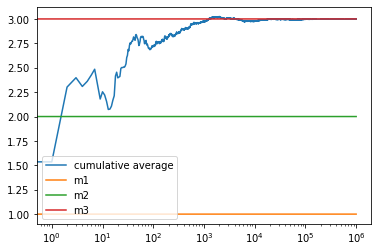

Mean of bandits: 

2.8047015792023844
2.8582240568305814
2.9997606652751583
Sample reward values: 
[3.83823002 2.86709133 3.52481583 1.31514968 3.10788538 3.15823363
 4.01715538 3.18961813 3.485867   3.35378353 4.03948728 4.21851501
 2.26888165 2.4551739  4.43211914 2.36849721 2.72152881 3.75865639
 3.21777067 1.68687546 4.36627793 3.57926721 2.77545085 2.01759526
 2.2170792  1.62678148 1.09361199 3.46863912 3.82787437 2.89902955
 2.51486895 2.66294912 2.95439658 5.04273361 3.5123271  3.50892296
 1.93746618 3.73795268 3.49985505 4.77026712 2.14908749 2.76223553
 2.49395815 2.73182816 2.29634719 1.01346761 3.3789217  2.42342031
 3.08213549 3.81564342]


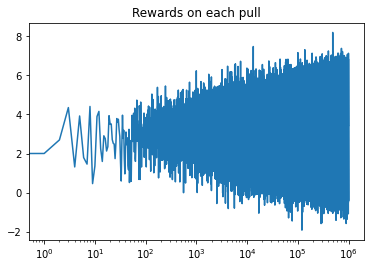

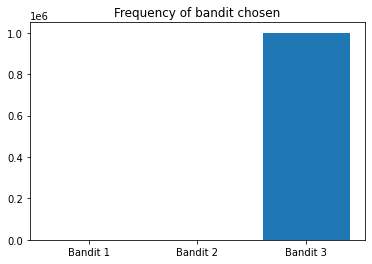

plotting cum avg on log scale...


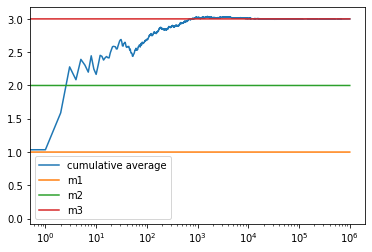

Mean of bandits: 

2.7424336198052655
2.6147762154082974
2.999156847702989
Sample reward values: 
[3.27757837 2.69004515 2.68786174 1.83387884 1.78583415 2.27300878
 3.8589054  2.28922493 1.69971438 1.85019464 3.68666087 1.15048364
 2.0239871  3.13015017 2.08519678 4.28792995 3.54751633 4.60016137
 2.98751375 2.07888465 1.79949212 2.82424659 1.42753411 5.01820742
 4.06411464 4.64365686 3.93315036 4.11639259 3.74178572 3.00753056
 3.15897766 4.17710644 1.79655857 1.41346056 2.47694077 2.44776409
 1.17475561 2.84381299 4.79675163 4.05680698 2.75018261 5.09323269
 2.27647133 3.22502043 2.3687766  2.11628558 3.10106852 4.16735082
 3.05279359 3.2484936 ]


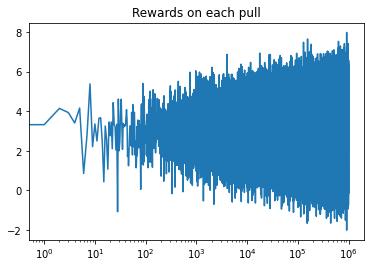

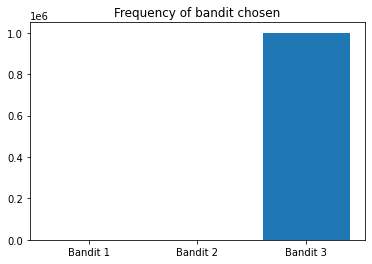

plotting cum avg on log scale...


/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


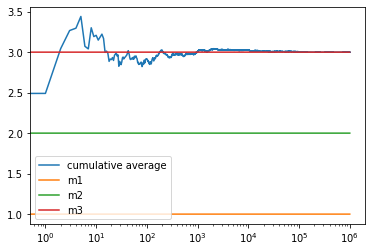

Mean of bandits: 

2.6840738345600954
2.9569189728914145
2.9997584618756754


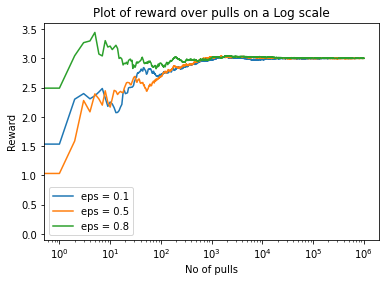

In [0]:
if __name__ == '__main__':
  c_1 = run_game_optimistic(1.0,2.0,3.0, 1000000)
  c_5 = run_game_optimistic(1.0,2.0,3.0, 1000000)
  c_8 = run_game_optimistic(1.0,2.0,3.0, 1000000)

  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_5, label='eps = 0.5')
  plt.plot(c_8, label='eps = 0.8')
  plt.legend()
  plt.title("Plot of reward over pulls on a Log scale")
  plt.xlabel("No of pulls")
  plt.ylabel("Reward")
  plt.xscale('log')
  plt.show()



Ok, Now I am questioning the very basis of this experiment !!
Because it does not look like bandits 1 & 2 are being pulled at all. Because the true mean of the third bandit is high, it always chooses that.